<b>Jacob J. Zhang</b><br>
<i>CISC 5420 Midterm Project</i><br>
Do Less Populated Regions Provide a Better Measure of Well-Being?

The question that is being posed is whether or not regions of the United States with lower population counts tend to correlate with a higher level of well-being. To measure well-being, we will use a microcosmic version of the Human Development Index, a metric comprised of access of healthcare, educational attainment level, and income, which strives to measure the well-being of nations.

The first step is to wrangle our data so that we are able to properly utilize the thinkstats2 and pandas libraries. We'll start with the data on educational establishments and build up better column names.


In [2]:
%matplotlib inline

import numpy
import pandas

frame = pandas.read_csv('datasets/educational_est_values.csv', sep=',', encoding='latin-1', skiprows=1)
print("List of columns\n")
print(frame.columns)

# These column names would be difficult to work with, so we'll use set our own:
# new_columns = ['geoid', 'geoid2', 'geodisplay', 'naicsid', 'establishment_type', 'op_type', 'tax_type', 'year', 'est_count', 'receipts', 'op_exp', 'payroll', 'q1payroll', 'employees', 'receipts_from_admin', 'receipts_from_estimate']
edu_by_geo = frame.set_index('Geographic area name', drop=False)
print("\nType of Educational Services and Totals\n")
print(edu_by_geo['Meaning of 2012 NAICS code'].value_counts())


List of columns

Index(['Geographic identifier code', 'Id2', 'Geographic area name',
       '2012 NAICS code', 'Meaning of 2012 NAICS code',
       'Type of operation or tax status code',
       'Meaning of Type of operation or tax status code', 'Year',
       'Number of establishments', 'Receipts/Revenue ($1,000)',
       'Operating expenses ($1,000)', 'Annual payroll ($1,000)',
       'First-quarter payroll ($1,000)',
       'Number of paid employees for pay period including March 12',
       'Percent of receipts/revenue from administrative records (%)',
       'Percent of receipts/revenue estimated (%)'],
      dtype='object')

Type of Educational Services and Totals

Educational support services                               1269
Educational services                                        990
Sports and recreation instruction                           922
Fine arts schools                                           916
Technical and trade schools                                 908


It is also important to know how many regions we will be analyzing. To keep the sample size small, we will only count unique regions, which tally up to 166. Knowing that, we can also generalize and look at all educational establishments per region, as the separation between the establishment types is not crucial for our analysis. 

To get a better intuition for this particular series, the maximum and minimum values will also be counted. Sorting all educational establishments reveal that the NY-NJ-CT-PA region has the most educational establishments, while Moses Lake-Othello in Washington has the least. This is expected, as larger populations would correlate with more schools, training facilities, etc.

In [3]:
print('Total Regions :', len(edu_by_geo['Geographic area name'].unique()))
all_edu_est = edu_by_geo[edu_by_geo['Meaning of Type of operation or tax status code'] == 'All establishments']
flattened_all_edu_est = all_edu_est.groupby('Geographic area name').sum().sort('Number of establishments', ascending=False)
print(flattened_all_edu_est['Number of establishments'])
print('Maximum :', flattened_all_edu_est['Number of establishments'].max())
print('Minimum :', flattened_all_edu_est['Number of establishments'].min())

Total Regions : 166
Geographic area name
New York-Newark, NY-NJ-CT-PA CSA                        38887
Los Angeles-Long Beach, CA CSA                          21990
Washington-Baltimore-Arlington, DC-MD-VA-WV-PA CSA      14766
San Jose-San Francisco-Oakland, CA CSA                  14328
Chicago-Naperville, IL-IN-WI CSA                        13399
Boston-Worcester-Providence, MA-RI-NH-CT CSA            13233
Miami-Fort Lauderdale-Port St. Lucie, FL CSA             9494
Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA             8670
Atlanta--Athens-Clarke County--Sandy Springs, GA CSA     8519
Seattle-Tacoma, WA CSA                                   8065
Dallas-Fort Worth, TX-OK CSA                             7687
Denver-Aurora, CO CSA                                    6674
Houston-The Woodlands, TX CSA                            6118
Minneapolis-St. Paul, MN-WI CSA                          5627
Detroit-Warren-Ann Arbor, MI CSA                         5377
Portland-Vancouver-Salem, OR-

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


At this step, we will want to add population numbers to the data in order to see how these values compare. Sorting through the columns, the best estimate to use would be the 2015 estimates as they are the latest. These numbers can be visualized below:

In [4]:
populations = pandas.read_csv('datasets/population_values.csv', sep=',', index_col=False, encoding='latin-1', skiprows=1, skipfooter=4)
print(populations.columns)
pop_index = populations.set_index('Geographic region', drop=False)
latest_pop = pop_index[pop_index['Geographic region'] != 'United States']['Population Estimate (as of July 1) - 2015']
print(latest_pop)

Index(['Id', 'Id2', 'Geography', 'Target Geo Id', 'Target Geo Id2', 'Country',
       'Geographic region', 'April 1, 2010 - Census',
       'April 1, 2010 - Estimates Base',
       'Population Estimate (as of July 1) - 2010',
       'Population Estimate (as of July 1) - 2011',
       'Population Estimate (as of July 1) - 2012',
       'Population Estimate (as of July 1) - 2013',
       'Population Estimate (as of July 1) - 2014',
       'Population Estimate (as of July 1) - 2015'],
      dtype='object')
Geographic region
Albany-Schenectady, NY CSA                              1173891
Albuquerque-Santa Fe-Las Vegas, NM CSA                  1168533
Amarillo-Borger, TX CSA                                  283790
Appleton-Oshkosh-Neenah, WI CSA                          402553
Asheville-Brevard, NC CSA                                480051
Atlanta--Athens-Clarke County--Sandy Springs, GA CSA    6365108
Bend-Redmond-Prineville, OR CSA                          196898
Birmingham-Hoover-Tallade

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


The population can now be concatenated with the previous table dictating the number of establishments. We expect a high correlation between the number of establishments in a region and its population estimate, and we find this to be true when calculated.

Because using raw establishment counts and population estimates will provide sufficient insight, it is important to then calculate the number of residents per educational establishments. This gives a sense of how many people each school or training facility can service-- a far better metric to use when determining well-being.


In [5]:
edu_and_pop = pandas.concat([flattened_all_edu_est['Number of establishments'], latest_pop], axis=1).sort('Population Estimate (as of July 1) - 2015')
edu_and_pop.corr()

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Number of establishments,Population Estimate (as of July 1) - 2015
Number of establishments,1.000000,0.981849
Population Estimate (as of July 1) - 2015,0.981849,1.000000


In [59]:
edu_table = pandas.concat([flattened_all_edu_est['Number of establishments'], latest_pop], axis=1)
edu_table['Residents per Edu. Est.'] = edu_table['Population Estimate (as of July 1) - 2015'] / edu_table['Number of establishments']
full_edu_table = edu_table[['Residents per Edu. Est.', 'Population Estimate (as of July 1) - 2015']].sort('Residents per Edu. Est.')
pandas.set_option('max_colwidth',20)
full_edu_table

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Residents per Edu. Est.,Population Estimate (as of July 1) - 2015
"Edwards-Glenwood Springs, CO CSA",387.685629,129487
"Steamboat Springs-Craig, CO CSA",416.483146,37067
"Denver-Aurora, CO CSA",512.267905,3418876
"Seattle-Tacoma, WA CSA",570.687043,4602591
"San Jose-San Francisco-Oakland, CA CSA",608.173786,8713914
"New York-Newark, NY-NJ-CT-PA CSA",610.067529,23723696
"Boston-Worcester-Providence, MA-RI-NH-CT CSA",616.078969,8152573
"Bend-Redmond-Prineville, OR CSA",649.828383,196898
"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA CSA",651.859678,9625360
"Springfield-Greenfield Town, MA CSA",654.783784,702583


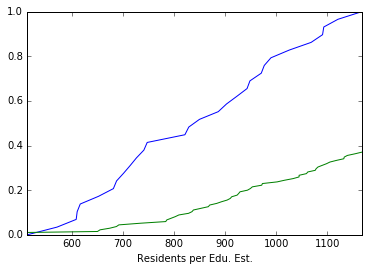

In [7]:
large_cities = full_edu_table[full_edu_table['Population Estimate (as of July 1) - 2015'] > 2000000]
small_cities = full_edu_table[full_edu_table['Population Estimate (as of July 1) - 2015'] < 2000000]

ser1 = large_cities['Residents per Edu. Est.']
cum_dist = numpy.linspace(0.,1., len(ser1))
ser_cdf = pandas.Series(cum_dist, index=ser1)
edu_plot = ser_cdf.plot(drawstyle='line')

ser2 = small_cities['Residents per Edu. Est.']
cum_dist = numpy.linspace(0.,1., len(ser2))
ser_cdf2 = pandas.Series(cum_dist, index=ser2)
edu_plot.plot(ser_cdf2)

Below is a histogram of population count versus numbers of educational establishment. This visualizaiton will give us a more intuitive sense of whether or not larger populations are guaranteed to spawn much more educational establishments. It seems that the majority of the establishments service around 1,000 people, tough some are servicing nearly 5,000. In terms of well-being, we can argue that the lower number of people that an establishment has to cater to, the better. This is due to more individual attention and better ease of organization.

With the use of distribution fitting, we are able to see if this can be modeled.

Axes(0.125,0.125;0.775x0.775)


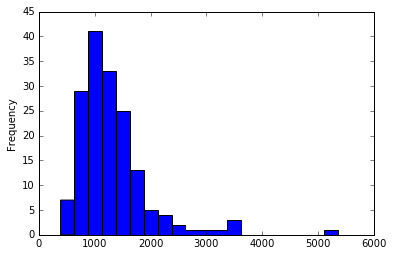

In [8]:
print(full_edu_table['Residents per Edu. Est.'].plot(by='Residents per Edu. Est.', kind='hist', bins=20))
# maybe plot complimentary CDF

Display the histogram.

/Users/user/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


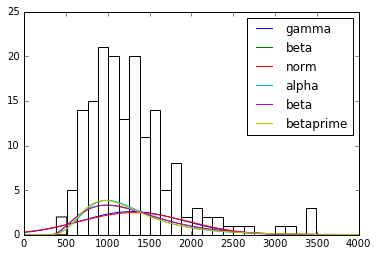

In [9]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 4000
x = scipy.arange(size)
y = full_edu_table['Residents per Edu. Est.'].astype(float).dropna().as_matrix()
h = plt.hist(y, bins=40, color='w')

dist_names = ['gamma', 'beta', 'norm', 'alpha', 'beta', 'betaprime']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    # pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,4000)
plt.legend(loc='upper right')
plt.show()

# try normal and change bins
# distribution sums to one

In [75]:
# Check education staff count, money spent towards education

# all_edu_est = edu_by_geo[edu_by_geo['Meaning of Type of operation or tax status code'] == 'All establishments']
# flattened_all_edu_est = all_edu_est.groupby('Geographic area name').sum().sort('Number of establishments', ascending=False)

all_edu_est = edu_by_geo[['Receipts/Revenue ($1,000)', 'Number of paid employees for pay period including March 12']]
print(all_edu_est.astype(float).dropna())
flattened_all_edu_est = all_edu_est.groupby('Geographic area name').sum().sort('Number of establishments', ascending=False)

# edu_rev_employees = flattened_all_edu_est[['Receipts/Revenue ($1,000)', 'Number of paid employees for pay period including March 12']]
# edu_rev_employees

ValueError: could not convert string to float: 'a'

We can now incorporate the number of healthcare institutions. It would be interesting to find the number of healthcare establishments compared to the number of educational establishments.

In [10]:
health_est = pandas.read_csv('datasets/health_est_values.csv', sep=',', encoding='latin-1', skiprows=1)
health_est = health_est.set_index('Geographic area name', drop=False)
health_est_all = health_est[health_est['Meaning of Type of operation or tax status code'] == 'All establishments']
flattened_all_health_est = health_est_all.groupby('Geographic area name').sum().sort('Number of establishments', ascending=False)
health_edu_est = pandas.concat([flattened_all_health_est['Number of establishments'], flattened_all_edu_est['Number of establishments']], axis=1)
health_edu_est.columns = ['Health Establishments', 'Educational Establishments']

print(health_edu_est)
print(health_edu_est.corr())

                      Health Establishments  Educational Establishments
Albany-Schenectad...                16692                   1329       
Albuquerque-Santa...                15135                   1701       
Amarillo-Borger, ...                 3763                    184       
Appleton-Oshkosh-...                 4951                    342       
Asheville-Brevard...                 6959                    575       
Atlanta--Athens-C...                73267                   8519       
Bend-Redmond-Prin...                 3258                    303       
Birmingham-Hoover...                14490                   1029       
Bloomington-Bedfo...                 2245                    252       
Bloomington-Ponti...                 2390                    213       
Bloomsburg-Berwic...                 3534                    122       
Boise City-Mounta...                10292                    732       
Boston-Worcester-...               112850                  13233

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Axes(0.125,0.125;0.775x0.775)
166


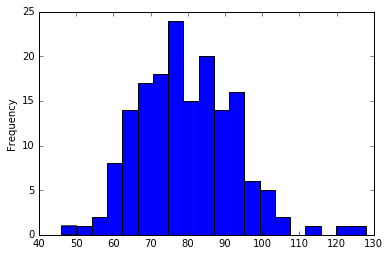

In [11]:
health_pop_table = pandas.concat([flattened_all_health_est['Number of establishments'], latest_pop], axis=1)
health_pop_table['Residents per Health Est.'] = health_pop_table['Population Estimate (as of July 1) - 2015'] / health_pop_table['Number of establishments']

# plot large population vs small populations on top
health_ratio_hist = health_pop_table['Residents per Health Est.'].plot(by='Residents per Health Est.', kind='hist', bins=20)
print(health_ratio_hist)
print(len(health_pop_table['Residents per Health Est.'].astype(float).dropna().as_matrix()))

# plot CCDF

(28.105490868563976, 11.231168504074514, 2.4389919142269818)
(26.808047003652845, 70165.286698340322, 12.734172112231505, 175551.34321775631)
(79.780232666489127, 12.974037183423739)
(1.8671673500086552, -0.10789983311978182, 46.153862543743969)


/Users/user/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


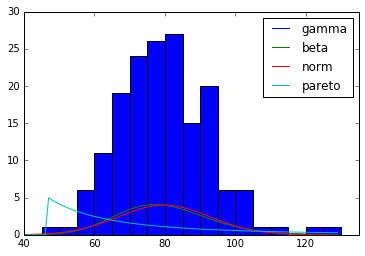

In [12]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 130
x = scipy.arange(size)
y = health_pop_table['Residents per Health Est.'].astype(float).dropna().as_matrix()
h = plt.hist(y, bins=numpy.arange(40, 140, 5), color='b')

dist_names = ['gamma', 'beta', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    print(param)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(40,135)
plt.legend(loc='upper right')
plt.show()

# add titles/labels

Not surprisingly, there is a high correlation between the number of educational establishments versus the number of healthcare establishments. Both increase with the population. What's interesting to note is that the "residents per healthcare institution" figures have a more even distribution. This could be explained by many reasons-- one of which is that society places a higher priority on healthcare than on education. Another possibility could be that healthcare is more meritocratic than education.

We'll now want to incorporate incomes and wealth into this equation. A column called "Payroll per employee" was calculated by dividing the "Annual payroll" of a region with its "number of paid employees". While not wholly accurate, we care more about the relativitiy of the incomes than on precision. We can then integrate this in with the rest of our data. 

In [13]:
business = pandas.read_csv('datasets/business_est_values.csv', sep=',', encoding='latin-1', skiprows=13, skipfooter=24) 
print(business.columns)

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


Index(['Geographic area name', 'Unnamed: 1', 'Unnamed: 2', '2012 NAICS code',
       'Meaning of 2012 NAICS code', 'Meaning of Gender code', 'Unnamed: 6',
       'Unnamed: 7', 'Meaning of Ethnicity code', 'Unnamed: 9',
       'Meaning of Race code', 'Year',
       'Number of firms with or without paid employees',
       'Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)',
       'Number of firms with paid employees',
       'Sales, receipts, or value of shipments of firms with paid employees ($1,000)',
       'Number of paid employees for pay period including March 12',
       'Payroll Per Employee', 'Annual payroll ($1,000)',
       'Sales, receipts, or value of shipments of firms without paid employees ($1,000)',
       'Relative standard error of number of firms with or without paid employees (%)',
       'Relative standard error of sales, receipts, or value of shipments of firms with or without paid employees (%)',
       'Relative standard err

In [14]:
business_totals = business[business['Meaning of 2012 NAICS code'] == 'Total for all sectors']
business_grouped = business_totals[['Geographic area name', 'Payroll Per Employee']].groupby('Geographic area name').sum()
pandas.concat([health_edu_est, business_grouped['Payroll Per Employee']], axis=1).sort('Payroll Per Employee')

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Health Establishments,Educational Establishments,Payroll Per Employee
"Brownsville-Harlingen-Raymondville, TX CSA",5245.0,184.0,26
"McAllen-Edinburg, TX CSA",10934.0,386.0,26
"Clovis-Portales, NM CSA",756.0,22.0,27
"Hot Springs-Malvern, AR CSA",1852.0,87.0,28
"Martin-Union City, TN-KY CSA",917.0,21.0,28
"Manhattan-Junction City, KS CSA",1420.0,126.0,28
"Myrtle Beach-Conway, SC-NC CSA",5527.0,383.0,29
"El Paso-Las Cruces, TX-NM CSA",10200.0,670.0,29
"Lubbock-Levelland, TX CSA",4586.0,316.0,3
"Fayetteville-Lumberton-Laurinburg, NC CSA",6265.0,348.0,30


In [41]:
# Merge health establishment count with payroll per employee

full_table = pandas.concat([health_edu_est, business_grouped['Payroll Per Employee']], axis=1).sort('Payroll Per Employee').dropna()
full_table.astype(float).corr()

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Health Establishments,Educational Establishments,Payroll Per Employee
Health Establishments,1.000000,0.987426,0.590721
Educational Establishments,0.987426,1.000000,0.605346
Payroll Per Employee,0.590721,0.605346,1.000000


In [16]:
# flattened_all_edu_est['Number of establishments']
edu_table = pandas.concat([flattened_all_edu_est['Number of establishments'], latest_pop], axis=1)
full_table['Residents per Edu. Est.'] = edu_table['Population Estimate (as of July 1) - 2015'] / edu_table['Number of establishments']
full_table.astype(float).corr()

,Health Establishments,Educational Establishments,Payroll Per Employee,Residents per Edu. Est.
Health Establishments,1.000000,0.987426,0.590721,-0.296601
Educational Establishments,0.987426,1.000000,0.605346,-0.306590
Payroll Per Employee,0.590721,0.605346,1.000000,-0.358772
Residents per Edu. Est.,-0.296601,-0.306590,-0.358772,1.000000


In [17]:
# flattened_all_edu_est['Number of establishments']
health_table = pandas.concat([flattened_all_health_est['Number of establishments'], latest_pop], axis=1)
full_table['Residents per Health Est.'] = health_table['Population Estimate (as of July 1) - 2015'] / health_table['Number of establishments']
full_table.astype(float).corr()

,Health Establishments,Educational Establishments,Payroll Per Employee,Residents per Edu. Est.,Residents per Health Est.
Health Establishments,1.000000,0.987426,0.590721,-0.296601,-0.157164
Educational Establishments,0.987426,1.000000,0.605346,-0.306590,-0.144445
Payroll Per Employee,0.590721,0.605346,1.000000,-0.358772,-0.074673
Residents per Edu. Est.,-0.296601,-0.306590,-0.358772,1.000000,0.414564
Residents per Health Est.,-0.157164,-0.144445,-0.074673,0.414564,1.000000


The most important step now will be deriving our microcosmic HDI. To do this, we will take the two relative figures (residents per educational establishment and residents per healthcare establishment) and compare them to the max and mins of their series to achieve a relative score. We will then do the same with payroll to see which regions provide the highest level of well-being.

In [18]:
from scipy import stats
from scipy.stats.mstats import gmean

full_table['Residents Per Edu Percentile'] = 1 - stats.rankdata(full_table['Residents per Edu. Est.'], "average")/len(full_table['Residents per Edu. Est.'])
full_table['Residents Per Health Percentile'] = 1 - stats.rankdata(full_table['Residents per Health Est.'], "average")/len(full_table['Residents per Health Est.'])
full_table['Payroll Percentile'] = (stats.rankdata(full_table['Payroll Per Employee'], "average")/len(full_table['Payroll Per Employee']))
# need composite static/metric to integrate all 3
res = full_table['Residents Per Edu Percentile'] * full_table['Residents Per Health Percentile'] * full_table['Payroll Percentile'] 
full_table['HDI'] = res**(1. / 3.)

clean_full_table = full_table[['Residents Per Edu Percentile', 'Residents Per Health Percentile', 'Payroll Percentile', 'HDI']]

clean_full_table.sort('HDI')

# payroll percentile (1 minus)
# equal weighing

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Residents Per Edu Percentile,Residents Per Health Percentile,Payroll Percentile,HDI
"Moses Lake-Othello, WA CSA",0.000000,0.000000,0.515152,0.000000
"DeRidder-Fort Polk South, LA CSA",0.109091,0.006061,0.072727,0.036364
"Visalia-Porterville-Hanford, CA CSA",0.036364,0.012121,0.154545,0.040840
"Clovis-Portales, NM CSA",0.024242,0.187879,0.018182,0.043588
"Brownsville-Harlingen-Raymondville, TX CSA",0.048485,0.327273,0.009091,0.052445
"Dixon-Sterling, IL CSA",0.012121,0.054545,0.303030,0.058515
"McAllen-Edinburg, TX CSA",0.060606,0.406061,0.009091,0.060707
"El Paso-Las Cruces, TX-NM CSA",0.193939,0.030303,0.045455,0.064404
"Martin-Union City, TN-KY CSA",0.018182,0.533333,0.030303,0.066483
"Pullman-Moscow, WA-ID CSA",0.054545,0.103030,0.096970,0.081681


Upon first glance, after sorting by HDI, it appears that the answer to our initial question is a resounding "no". When accounting for access to healthcare, education availability, and average income, the larger cities do seem to come out ahead. However, to check this, let's analyze the distribution of HDI and try to see if there is a substantial difference when accounting for population.

Index(['HDI', 'Population Estimate (as of July 1) - 2015'], dtype='object')
Index(['HDI', 'Population Estimate (as of July 1) - 2015'], dtype='object')


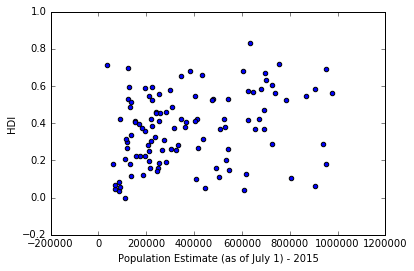

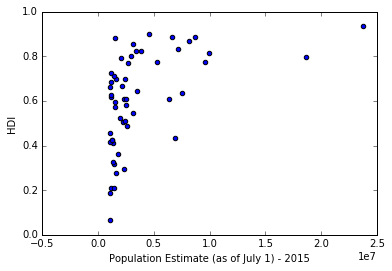

In [56]:
HDIpct = clean_full_table['HDI']
hdi_pop = pandas.concat([HDIpct, latest_pop], axis=1)

hp_small_cities = hdi_pop[hdi_pop['Population Estimate (as of July 1) - 2015'] < 1000000]
hp_large_cities = hdi_pop[hdi_pop['Population Estimate (as of July 1) - 2015'] > 1000000]

small_plot = hp_small_cities.plot(kind='scatter', y='HDI', x='Population Estimate (as of July 1) - 2015')
large_plot = hp_large_cities.plot(kind='scatter', y='HDI', x='Population Estimate (as of July 1) - 2015')

# ser1 = hp_large_cities['HDI']
# cum_dist = numpy.linspace(0.,1., len(ser1))
# ser_cdf = pandas.Series(cum_dist, index=ser1)
# lc_plot = ser_cdf.plot(drawstyle='line')

# ser2 = hp_small_cities['HDI']
# cum_dist = numpy.linspace(0.,1., len(ser2))
# ser_cdf2 = pandas.Series(cum_dist, index=ser2)
# lc_plot.plot(ser_cdf2)

print(hdi_pop.columns)
print(hp_large_cities.columns)

If population is above a million, more likely to have a high HDI.